In [30]:
# Cell 1 - imports e instalación (ejecutar si hace falta)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [31]:
df = pd.read_csv("dataset_wear.csv")

In [35]:
# convertir timestamp a datetime si está en ISO
if "timestamp" in df.columns:
    df["timestamp"] = pd.to_datetime(df["timestamp"], utc=True)
# ordenar por tiempo
df = df.sort_values(["device_id", "timestamp"])
df.reset_index(drop=True, inplace=True)
df.head()

,device_id,timestamp,lat,lon,ang,distance_m,speed,rpm,fuel_consumption,engine_temperature,Maintenance
0,veh_1,2025-12-08 19:45:31.682609+00:00,-75.592919,6.244177,317.144345,0.000000,0.00,0,0.60,70.00,0
1,veh_1,2025-12-08 19:45:41.884416+00:00,-75.593475,6.244132,204.484166,97.578993,18.73,1123,2.08,79.36,0
2,veh_1,2025-12-08 19:45:52.205285+00:00,-75.593697,6.243582,198.073220,163.118900,0.00,0,0.60,70.00,0
3,veh_1,2025-12-08 19:46:02.510826+00:00,-75.594157,6.243960,317.711814,236.882092,38.60,2315,4.33,89.30,0
4,veh_1,2025-12-08 19:46:12.677079+00:00,-75.595848,6.245814,317.703328,514.285194,0.09,5,0.60,70.05,0


In [39]:
#Eliminacion de registros donde la velocidad es cero
df = df[df["speed"]>0]

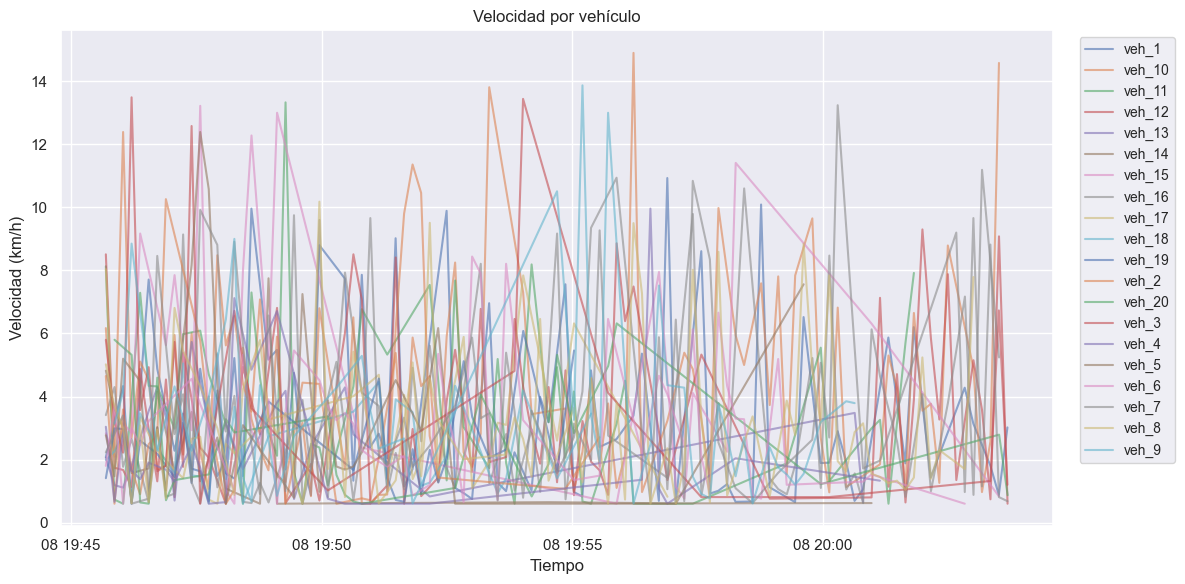

In [40]:
# Cell 4 - gráfico de velocidad en el tiempo por vehículo (muestra)
plt.figure(figsize=(12,6))
for veh_id, g in df.groupby("device_id"):
    plt.plot(g["timestamp"], g["fuel_consumption"], label=veh_id, alpha=0.6)
plt.legend(bbox_to_anchor=(1.02,1), loc="upper left", ncol=1, fontsize="small")
plt.xlabel("Tiempo")
plt.ylabel("Velocidad (km/h)")
plt.title("Velocidad por vehículo")
plt.tight_layout()
plt.show()

In [41]:
#Tomamos los ultimos minutos
end_2_ts = df["timestamp"].max() if "timestamp" in df.columns else pd.Timestamp.now(tz='UTC')
start_2_ts = end_2_ts - pd.Timedelta(minutes=2)
data_time_2 = df[df["timestamp"]>= start_2_ts]
start_1_ts = df["timestamp"].min() if "timestamp" in df.columns else pd.Timestamp.now(tz='UTC')
end_1_ts = start_1_ts + pd.Timedelta(minutes=2)
data_time_1 = df[df["timestamp"] <= end_1_ts]
#Calculamos promedio
avg_speed_2 = data_time_2.groupby('device_id')["speed"].mean().round(2)
avg_fuel_consumption_2 = data_time_2.groupby('device_id')["fuel_consumption"].mean().round(2)
avg_engine_temperature_2 = data_time_2.groupby('device_id')["engine_temperature"].mean().round(2)
avg_speed_1 = data_time_1.groupby('device_id')["speed"].mean().round(2)
avg_fuel_consumption_1= data_time_1.groupby('device_id')["fuel_consumption"].mean().round(2)
avg_engine_temperature_1 = data_time_1.groupby('device_id')["engine_temperature"].mean().round(2)
result = pd.DataFrame({'avg_speed_kmh_1': avg_speed_1, 
                        'avg_speed_kmh_2': avg_speed_2, 
                        "avg_fuel_cons_1" : avg_fuel_consumption_1,
                        "avg_fuel_cons_2" : avg_fuel_consumption_2, 
                        "avg_eng_temp_1": avg_engine_temperature_1,
                        "avg_eng_temp_2": avg_engine_temperature_2})
print(f"Ventana_1: {start_1_ts} → {end_1_ts}")
print(f"Ventana_2: {start_2_ts} → {end_2_ts}")
display(result)


Ventana_1: 2025-12-08 19:45:41.884416+00:00 → 2025-12-08 19:47:41.884416+00:00
Ventana_2: 2025-12-08 20:01:40.880810+00:00 → 2025-12-08 20:03:40.880810+00:00


,avg_speed_kmh_1,avg_speed_kmh_2,avg_fuel_cons_1,avg_fuel_cons_2,avg_eng_temp_1,avg_eng_temp_2
device_id,,,,,,
veh_1,34.72,27.03,3.50,2.97,87.36,98.51
veh_10,49.10,45.15,4.40,5.23,94.55,100.08
veh_11,42.49,71.03,4.50,7.92,91.24,113.01
veh_12,38.06,45.74,3.27,4.61,89.03,92.87
veh_13,30.79,NaN,2.70,NaN,85.40,NaN
veh_14,32.03,NaN,2.81,NaN,86.02,NaN
veh_15,51.42,3.47,5.50,0.83,95.71,71.73
veh_16,26.99,29.13,2.52,4.76,83.49,99.56
veh_17,28.94,NaN,2.74,NaN,84.47,NaN


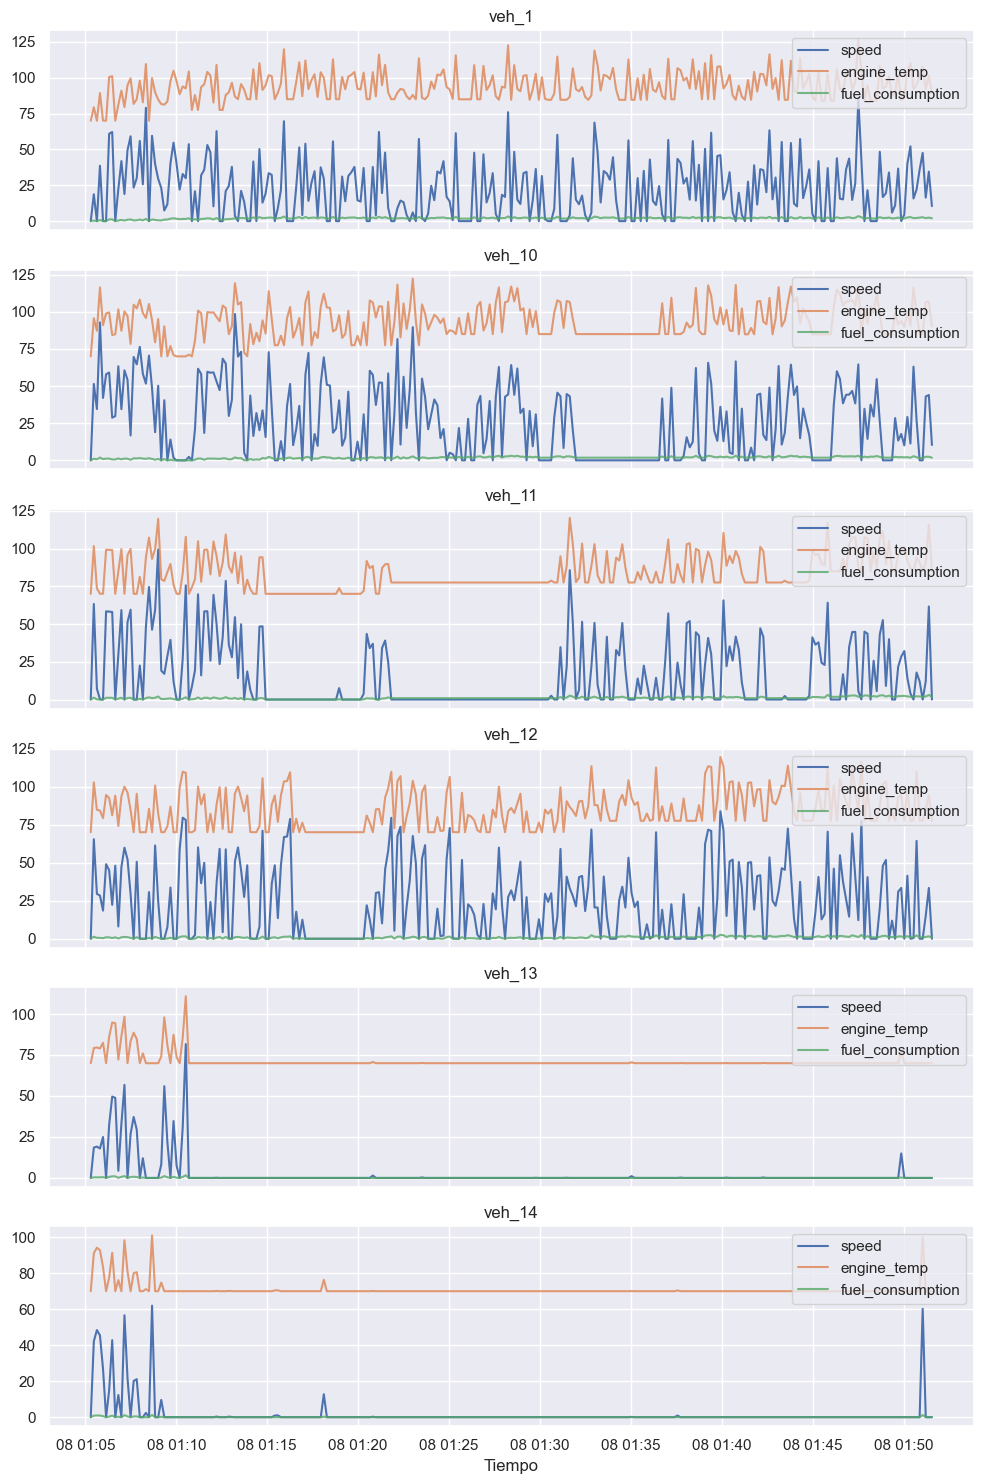

In [ ]:
# Cell 6 - subplots por vehículo (ej: primeros 6 vehículos)
vehicles = sorted(df["device_id"].unique())[:6]
fig, axes = plt.subplots(len(vehicles), 1, figsize=(10, 2.5*len(vehicles)), sharex=True)
for ax, veh in zip(axes, vehicles):
    g = df[df["device_id"]==veh]
    ax.plot(g["timestamp"], g["speed"], label="speed")
    ax.plot(g["timestamp"], g["engine_temperature"], label="engine_temp", alpha=0.8)
    ax.plot(g["timestamp"], g["fuel_consumption"], label="fuel_consumption", alpha=0.8)
    ax.set_title(veh)
    ax.legend(loc="upper right")
plt.xlabel("Tiempo")
plt.tight_layout()
plt.show()

In [ ]:
# Cell 7 - histograma / distribuciones (ej: velocidad)
plt.figure(figsize=(8,4))
sns.histplot(df["speed"].dropna(), bins=40, kde=True)
plt.xlabel("Velocidad (km/h)")
plt.title("Distribución de velocidades (todas las muestras)")
plt.show()